In [1]:
from sympy import lambdify
from sympy import symbols, integrate, solve
from scipy.optimize import minimize_scalar

In [2]:
# Define the reserve price symbol
reserve_price = symbols('reserve_price')

# Define the probability function of a bid exceeding the reserve price, linear from 900 to 1000
# The probability at 900 is 0, and at 1000 it's 1, so we can model this as (reserve_price - 900) / (1000 - 900)
probability_exceed = (reserve_price - 900) / (1000 - 900)

# Expected value calculation: the product of the probability of exceeding the reserve price and the profit margin
expected_value = probability_exceed * (1000 - reserve_price)

# Simplify the expected value function
simplified_ev = expected_value.simplify()

# Find the reserve price that maximizes the expected value
optimal_reserve_price_solution = solve(simplified_ev.diff(reserve_price), reserve_price)

optimal_reserve_price_solution, simplified_ev.subs(reserve_price, optimal_reserve_price_solution[0])


([950], 25)

Since the probability of a bid exceeding the reserve price increases linearly from 900 to 1000, we can model this probability as a function of the reserve price.

The calculation indicates that setting the reserve price at 950 SeaShells maximizes the sellers' expected value, providing them with the highest expected profit of 25 SeaShells (SHOWN BELOW). This result makes intuitive sense within the constraints of the problem: setting the reserve price too low (close to 900) would lead to a higher probability of the bid exceeding the reserve price but a smaller profit margin. Conversely, setting it too high (close to 1000) increases the profit margin but reduces the likelihood of the bid exceeding the reserve price due to the linear probability distribution.

At a reserve price of 950 SeaShells, there's an optimal balance between ensuring a reasonably high probability that bids will exceed this price (given the linear increase in probability as the price approaches 1000) and maintaining a substantial profit margin (50 SeaShells). This balance results in the highest expected value for the sellers from the sale of SCUBA gear.

Since it scales linearly, we can create PDF to find expected reserve price:

P(x) = (1/5000)(x-900)

∫xP(x) from 900 to 1000 = 966.67

Therefore E(reserve price) = 966.67

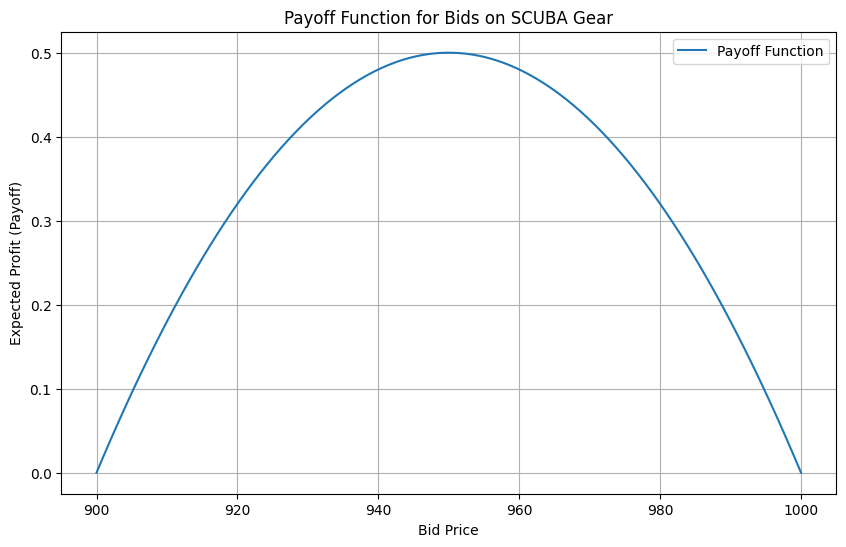

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bid range and k value
bid_range = np.linspace(900, 1000, 100)
k_value = 1/5000

# Calculate the payoff for each bid in the range
payoff = (1000 - bid_range) * ((bid_range - 900) / 5000)

# Plotting the payoff function
plt.figure(figsize=(10, 6))
plt.plot(bid_range, payoff, label='Payoff Function')
plt.xlabel('Bid Price')
plt.ylabel('Expected Profit (Payoff)')
plt.title('Payoff Function for Bids on SCUBA Gear')
plt.legend()
plt.grid(True)
plt.show()


P()

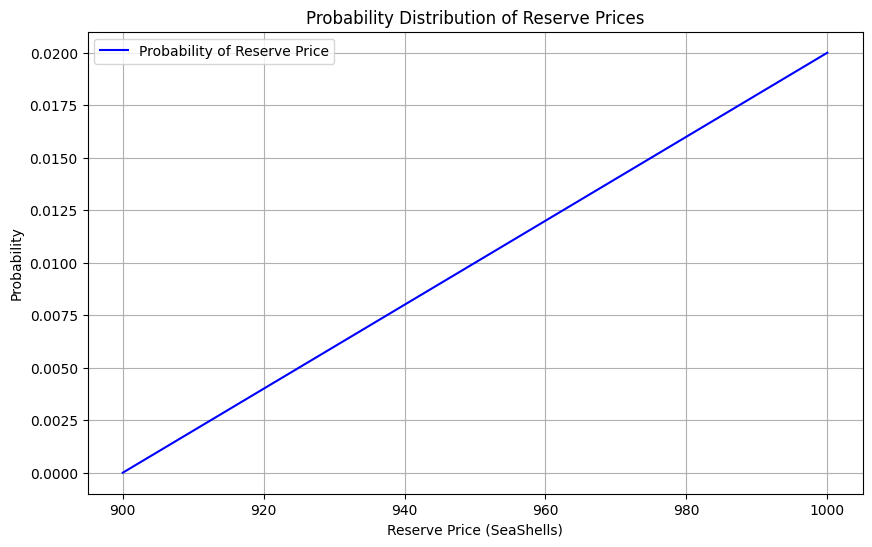

In [10]:
# Define the range of prices from 900 to 1000
prices = np.linspace(900, 1000, 100)

# Calculate the probability for each price using the linear probability distribution
# Since k = 1/5000 and probability scales linearly from least likely at 900 to most likely at 1000
probabilities = (prices - 900) * (1/5000)

# Plotting the prices vs their probability
plt.figure(figsize=(10, 6))
plt.plot(prices, probabilities, label='Probability of Reserve Price', color='blue')
plt.xlabel('Reserve Price (SeaShells)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Reserve Prices')
plt.legend()
plt.grid(True)
plt.show()


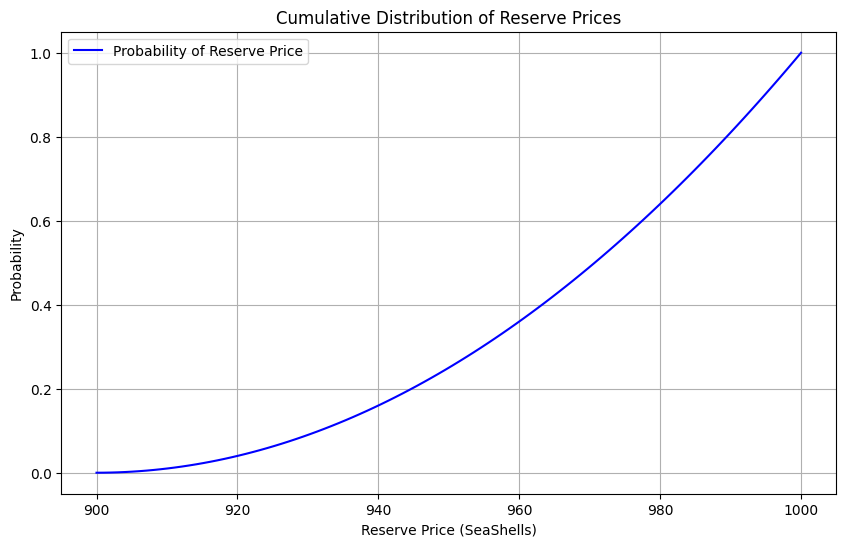

In [100]:
# Define the range of prices from 900 to 1000
prices = np.linspace(900, 1000, 100)
normalizedPrices = prices - 900
# Calculate the probability for each price using the linear probability distribution
# Since k = 1/5000 and probability scales linearly from least likely at 900 to most likely at 1000
probabilities = ((prices ** 2)/10000) - ((9 * prices)/50) + 81

# Plotting the prices vs their probability
plt.figure(figsize=(10, 6))
plt.plot(prices, probabilities, label='Probability of Reserve Price', color='blue')
plt.xlabel('Reserve Price (SeaShells)')
plt.ylabel('Probability')
plt.title('Cumulative Distribution of Reserve Prices')
plt.legend()
plt.grid(True)
plt.show()

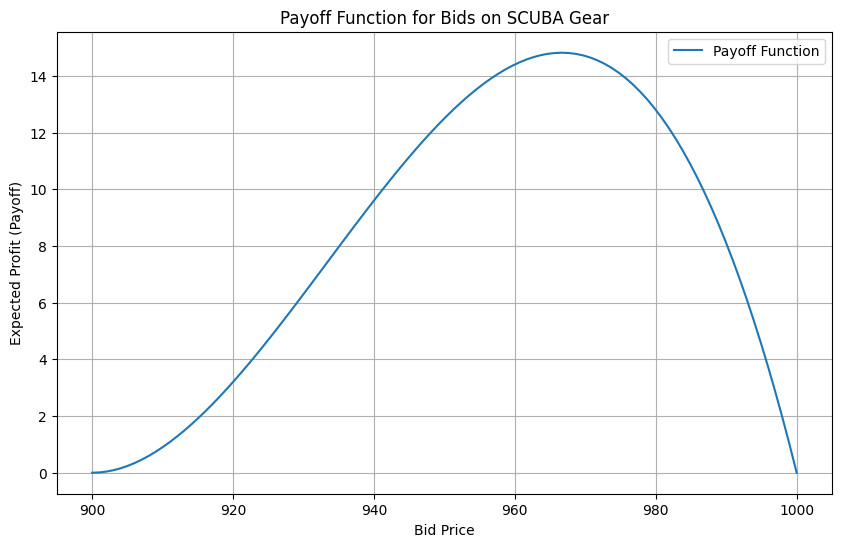

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bid range and k value
bid_range = np.linspace(900, 1000, 100)
k_value = 1/5000

# Calculate the payoff for each bid in the range
payoff = (1000 - bid_range) * probabilities

# Plotting the payoff function
plt.figure(figsize=(10, 6))
plt.plot(bid_range, payoff, label='Payoff Function')
plt.xlabel('Bid Price')
plt.ylabel('Expected Profit (Payoff)')
plt.title('Payoff Function for Bids on SCUBA Gear')
plt.legend()
plt.grid(True)
plt.show()

All of this code assumes that the probability of the reserve price being 900 is 0%. Regardless, max profit with this pdf is at 950.

WHAT WE KNOW:

Max profit for us is a bid at 950 = 25 seashells
Expected value of reserve price is 966.67
Profit if we bid at expected value of reserve price: 22.22 seashells
Bids must be whole numbers

GREEDY APPROACH:
So maybe our optimal strategy is to put low bid at 948 (to beat other bids and not lose too much) and high bid at 967 to be right above expected reserve price. 

P(reserve price <= 948) = 23.04
P(reserve price <= 967) = 44.89%

CONSERVATIVE APPROACH
Place our low bid at 971 (where we have a 50.41% chance of even being above the reserve price) and our high bid at 987 (where have a 75.69% chance)

I wonder if we can determine the distribution of bids??

In [82]:
# Setup for competing bidders and our strategy testing
n_competitors = 1000  # Number of competing bidders

# Generate competing bid strategies as lists of integers
expected_value_bids = np.round(np.random.normal(loc=967, scale=5, size=n_competitors)).astype(int)  # Around expected value
midpoint_bids = np.round(np.random.normal(loc=971, scale=5, size=n_competitors)).astype(int)  # Around midpoint
highest_payoff_bids = np.round(np.random.normal(loc=950, scale=5, size=n_competitors)).astype(int)  # Around highest payoff
random_strategy_bids = np.round(np.random.uniform(900, 1000, n_competitors)).astype(int)  # Random within the strategic range


# Generate random bid pairs for each competitor, ensuring whole number bids
random_bid_pairs = []
for _ in range(n_competitors):
    x = np.random.randint(900, 1000)
    y = np.random.randint(x + 1, 1001)
    random_bid_pairs.append((x, y))

# Ensure the second bid in each pair is not less than the first
random_bid_pairs = [(min(bid), max(bid)) for bid in random_bid_pairs]

# Function to simulate auctions and determine win rate for a given bid pair
# def simulate_auctions(bid_pair):
#     successes = 0
#     for i in range(10000):
#         u = np.random.uniform(0, 1)
#         reserve_price = 900 + 100 * np.sqrt(u)
#         all_bids = np.concatenate([bid_pair, expected_value_bids, midpoint_bids, highest_payoff_bids, random_strategy_bids])
#         valid_bids = all_bids[all_bids > reserve_price]  # Bids above the reserve price
#         if len(valid_bids) == 0:
#             continue  # No bids above reserve price
#         winning_bid = min(valid_bids)  # Closest bid above the reserve price
#         if winning_bid in bid_pair:
#             successes += 1
#     return successes / 10000


# Function to simulate auctions and determine win rate for a given bid pair
def simulate_auctions(bid_pair):
    successes = 0
    for i in range(10000):
        u = np.random.uniform(0, 1)
        reserve_price = 900 + 100 * np.sqrt(u)  # Generating reserve price according to distribution
        # Flatten bid pairs into a single array for comparison
        all_bids = np.array([bid for pair in random_bid_pairs for bid in pair] + list(bid_pair))
        valid_bids = all_bids[all_bids > reserve_price]  # Bids above the reserve price
        if len(valid_bids) == 0:
            continue  # No bids above reserve price
        winning_bid = min(valid_bids)  # Closest bid above the reserve price
        if winning_bid in bid_pair:
            successes += 1
    return successes / 10000

# Define the range of possible bids
bid_range = np.arange(900, 1001, 1)

# Initialize variables to store the best bid pair and its success rate
best_bid_pair = None
best_success_rate = 0

# Iterate over all possible combinations of bids
for bid_1 in bid_range:
    for bid_2 in bid_range:
        # Skip if the bids are the same
        if bid_1 == bid_2 or bid_1 > bid_2:
            continue

        # Calculate the success rate of the current bid pair
        current_success_rate = simulate_auctions((bid_1, bid_2))

        # Update the best bid pair and its success rate if the current success rate is higher
        if current_success_rate > best_success_rate:
            best_bid_pair = (bid_1, bid_2)
            best_success_rate = current_success_rate
            
# Print the best bid pair and its success rate
print("Best Bid Pair:", best_bid_pair)
print("Best Success Rate:", best_success_rate)




KeyboardInterrupt: 

Okay, turns out we actually play against bots this round for manual trading.

If we assume that these are the bots bid STRATEGIES:
expected_value_bids = np.random.normal(loc=967, scale=5, size=n_competitors)  # Around expected value
midpoint_bids = np.random.normal(loc=971, scale=5, size=n_competitors)  # Around midpoint
highest_payoff_bids = np.random.normal(loc=950, scale=5, size=n_competitors)  # Around highest payoff
random_strategy_bids = np.random.uniform(900, 1000, n_competitors)  # Random within the strategic range

Then the code above produces the following:
THIS SEEMS WRONG, FOLLOW THE OUTPUT BELOW
Best Bid Pair: (992, 997)
Best Success Rate: 0.1113

THIS ONE (Approx. 40 min of compute time)
Best Bid Pair: (992, 999)
Best Success Rate: 0.0422

Therefore total profit would be 8 * .8464 + 1 * .1337 = 6.9 seashells


If we assume that they are RANDOM, then we produce the following:
Best Bid Pair: (967, 986)
Best Success Rate: 0.053

Here's another attempt:

So maybe hedge for both: (967, 992)

Against random it hits ~3% of the time
Against strategies it hits ~


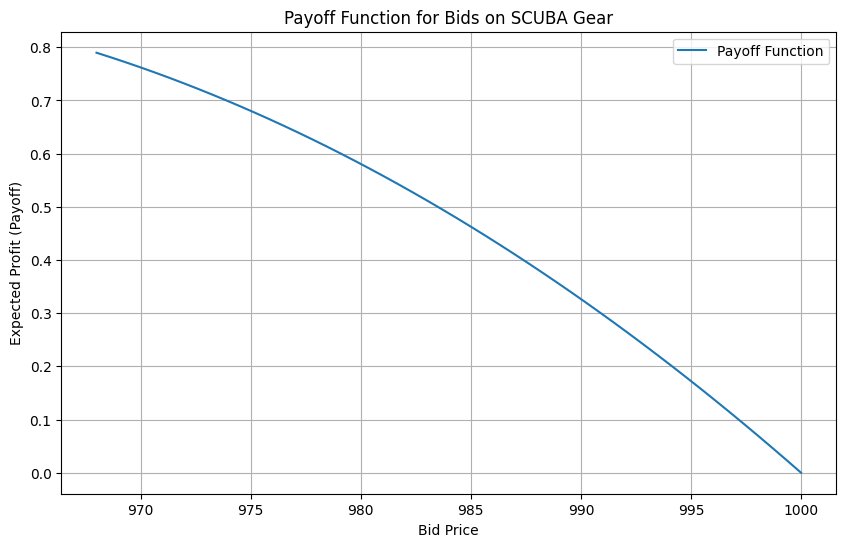

In [102]:
import numpy as np
import matplotlib.pyplot as plt
firstBid = 967
# Define the bid range and k value
bid_range = np.linspace(firstBid + 1, 1000, 50)
percent = (1/5000)*(firstBid - 900)
probabilityGreaterThan = 1 - (((firstBid-900) * percent) / 2)

# Calculate the payoff for each bid in the range
payoff = (1000 - bid_range) * ((bid_range - 900) / (5000 * probabilityGreaterThan))

# Plotting the payoff function
plt.figure(figsize=(10, 6))
plt.plot(bid_range, payoff, label='Payoff Function')
plt.xlabel('Bid Price')
plt.ylabel('Expected Profit (Payoff)')
plt.title('Payoff Function for Bids on SCUBA Gear')
plt.legend()
plt.grid(True)
plt.show()